# Case 2 - Canonical Correlation Analysis

### Import modules

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import train_test_split

import random
random.seed(42)

### Load data

In [2]:
data_path = '../../case_2-main/data/HR_data.csv'

data_pd = pd.read_csv(data_path)

### Separate identity indices from the actual data and emotion states

In [3]:
identifier_columns = ['Unnamed: 0','Round', 'Phase', 'Individual','Puzzler', 'Cohort']
emotion_columns = ['inspired', 'attentive', 'determined','active','alert','Frustrated', 'upset', 'hostile', 'ashamed', 'nervous', 'afraid']
numeric_columns = [col for col in data_pd.columns if col not in identifier_columns + emotion_columns]
data_pd = data_pd[identifier_columns + emotion_columns + numeric_columns]
print(data_pd.shape)

(312, 68)


### Remove observations with missing values

In [4]:
df = data_pd[numeric_columns + emotion_columns].dropna()

### Create input and output dataframes

In [5]:
X = df[numeric_columns].values
Y = df[emotion_columns].values

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

### CCA

In [6]:
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X_scaled,Y_scaled)


print("X Canonical Variates:", X_c)
print("Y Canonical Variates:", Y_c)

X Canonical Variates: [[ 2.32661313e-02  6.42813029e-02]
 [ 1.15464371e-02 -2.41922439e-02]
 [-4.51355554e-03  1.31853782e-01]
 [-8.03873922e-02  1.04224974e-01]
 [-3.26820865e-02 -6.38920965e-02]
 [ 4.28715784e-02 -6.92770599e-02]
 [ 4.29808772e-02 -5.36346284e-02]
 [-4.09112197e-03  6.04235504e-02]
 [ 1.69044094e-02  5.08055597e-02]
 [ 3.41449318e-02  4.28872547e-02]
 [-1.46568869e-03 -3.03229329e-02]
 [ 5.35386004e-02  5.57517073e-02]
 [-6.16818112e-02  2.00900868e-02]
 [-1.60333774e-02  7.34062671e-02]
 [ 1.88323846e-02  1.77737045e-01]
 [ 3.24057465e-02  1.22151222e-01]
 [-5.44497267e-02 -9.20742967e-02]
 [-4.85996188e-02  1.10628228e-01]
 [ 3.77256373e-02  5.35518475e-02]
 [-7.82024319e-02  4.11636275e-04]
 [-3.44872274e-02  5.21696889e-02]
 [ 8.62643971e-03  1.65892236e-01]
 [-6.00465618e-02 -3.11694179e-04]
 [-3.56265075e-03  1.00208724e-01]
 [-1.51336966e-02 -9.56697600e-02]
 [-7.34015944e-02  6.55023853e-02]
 [-4.91598681e-02 -6.79530186e-02]
 [-2.32882966e-02  7.06666004e-02

### CCA Plots

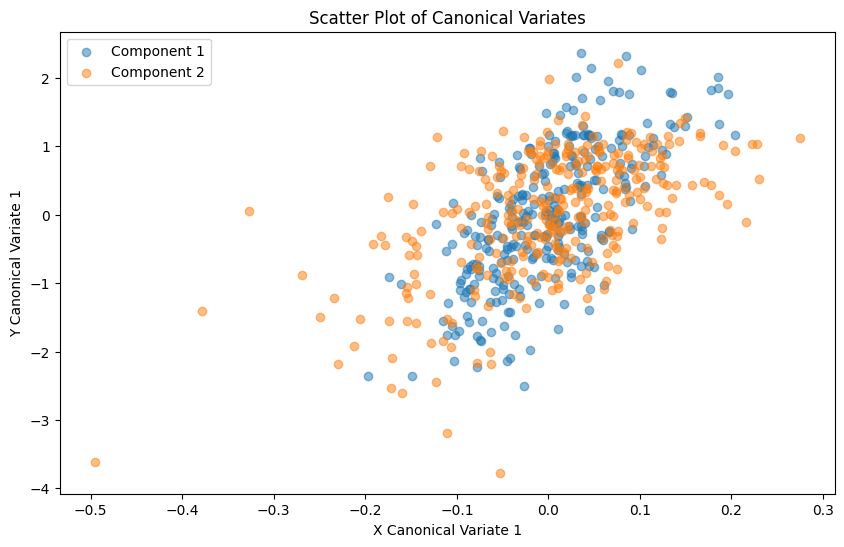

In [ ]:
#Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], label='Component 1', alpha=0.5)
plt.scatter(X_c[:, 1], Y_c[:, 1], label='Component 2', alpha=0.5)
plt.xlabel('X Canonical Variate 1')
plt.ylabel('Y Canonical Variate 1')
plt.legend()
plt.title('Scatter Plot of Canonical Variates')
plt.show()

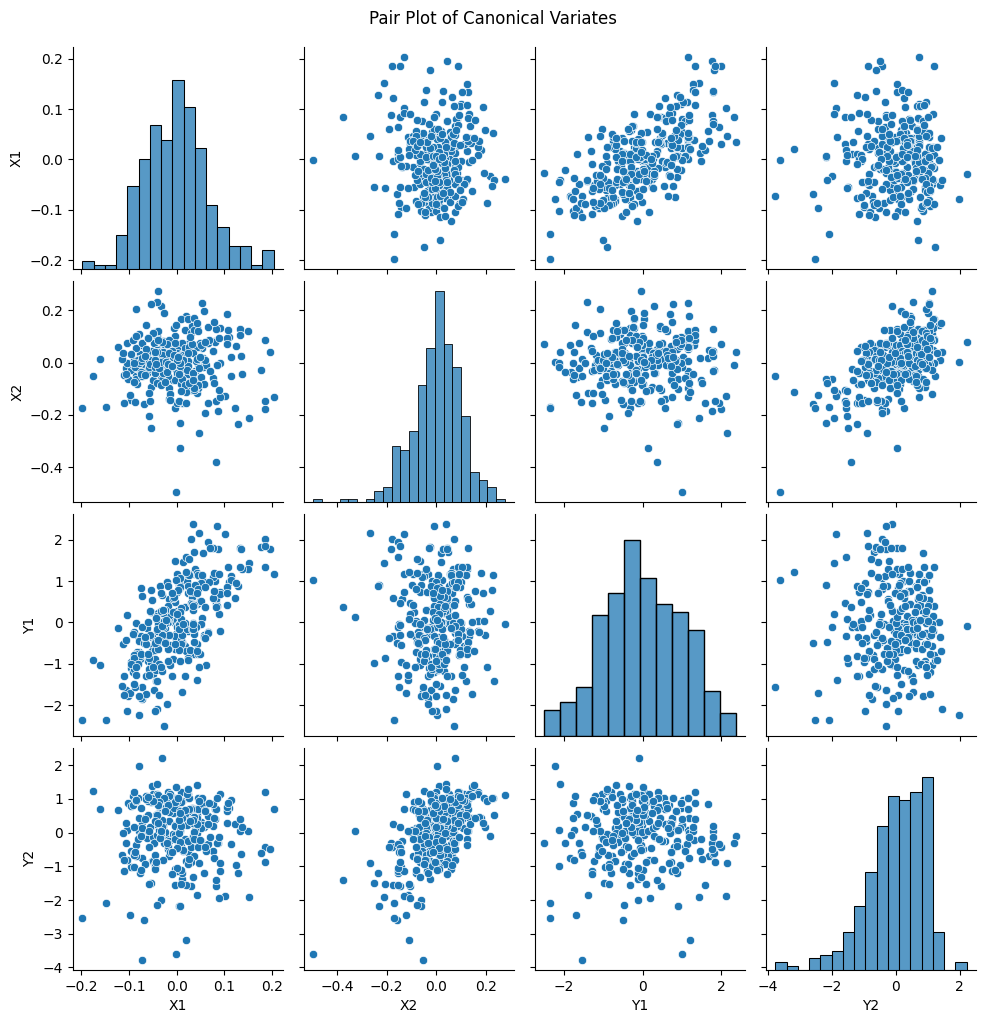

In [ ]:
cca_df = pd.DataFrame(np.hstack((X_c, Y_c)), columns=[f'X{i+1}' for i in range(X_c.shape[1])] + [f'Y{i+1}' for i in range(Y_c.shape[1])])

# Pair plot
sns.pairplot(cca_df)
plt.suptitle('Pair Plot of Canonical Variates', y=1.02)
plt.show()

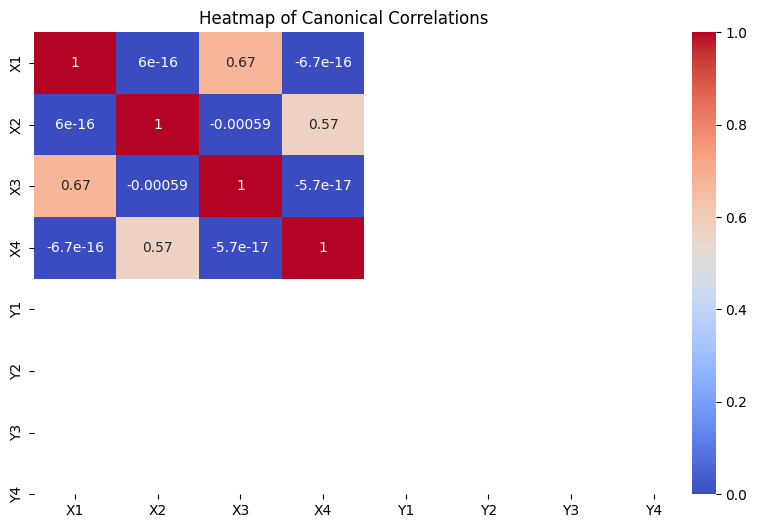

In [ ]:
correlation_matrix = np.corrcoef(X_c.T, Y_c.T)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['X1', 'X2', 'X3', 'X4', 'Y1', 'Y2', 'Y3', 'Y4'], yticklabels=['X1', 'X2', 'X3', 'X4', 'Y1', 'Y2', 'Y3', 'Y4'])
plt.title('Heatmap of Canonical Correlations')
plt.show()

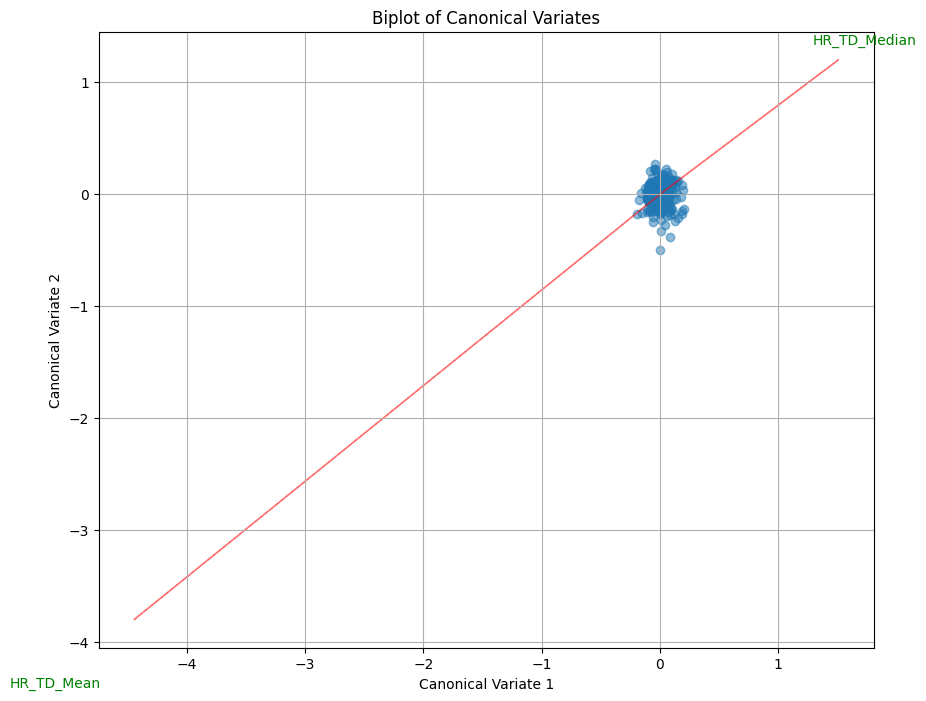

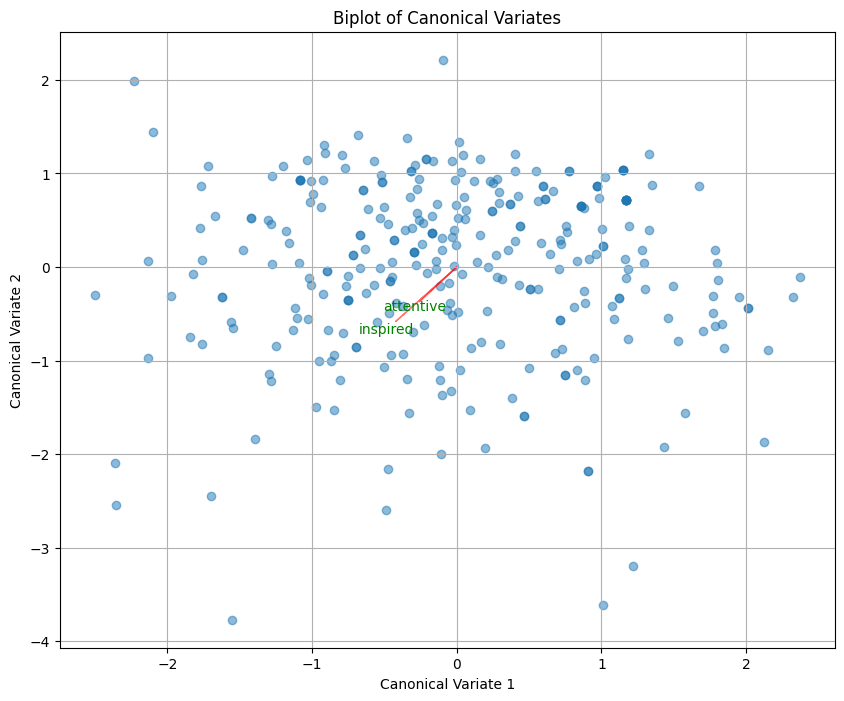

In [8]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    plt.figure(figsize=(10, 8))
    plt.scatter(xs, ys, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("Canonical Variate 1")
    plt.ylabel("Canonical Variate 2")
    plt.title('Biplot of Canonical Variates')
    plt.grid()
    plt.show()

# Biplot for X and Y
biplot(X_c[:,0:2], np.transpose(cca.x_loadings_[:,0:2]), labels=numeric_columns)
biplot(Y_c[:,0:2], np.transpose(cca.y_loadings_[:,0:2]), labels=emotion_columns)

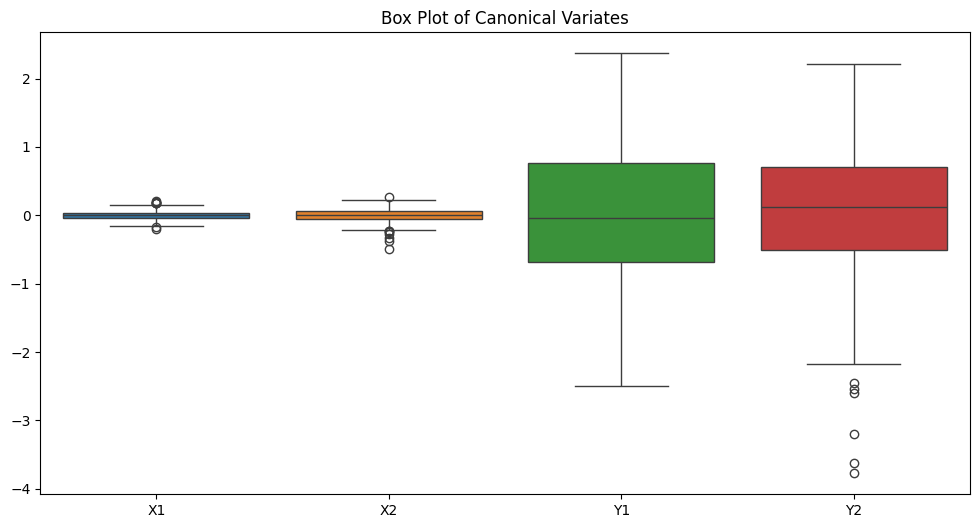

In [13]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cca_df)
plt.title('Box Plot of Canonical Variates')
plt.show()